# Moments

> In mathematics, a moment is a specific quantitative measure, used in both mechanics and statistics, of the shape of a set of points.

https://en.wikipedia.org/wiki/Moment_(mathematics)



If the points represent mass:
- the zeroth moment is the total mass
- the first moment divided by the total mass is the center of mass
- the second moment is the rotational inertia

If the points represent probability density:

- the zeroth moment is the total probability (i.e. one)
- the first moment is the mean
- the second central moment is the variance
- the third central moment is the skewness
- the fourth central moment (with normalization and shift) is the kurtosis.

### Continuous Probability

The $k$-th moment of a real-valued continuous function, a **probability density function**, $f(x)$ of a real variable about a value $c$ is

$$\mu_k = \int_{-\infty}^\infty (x - c)^k\,f(x)\,\mathrm{d}x$$

### Discrete Probabilty

The $k$-th moment of a real-valued discrete function, a **probability mass function**,  $p(x)$ of a real variable about a value $c$ is

$$\mu_k = \sum (x - c)^kp(x)$$

# Simple Case: the Mean

Consider the first moment for a discrete valued probabilty where each value has an equal chance of being observed.

Then, for a list of $n$ values

$$\mathcal{D} = \{x_1, \dots, x_n\}$$

each with probabilty $p(x_k)= \frac{1}{n}$

Then 

$$\mu_1 = \sum (x)^1p(x)= \sum x\frac{1}{n} = \frac{1}{n}\sum x$$

This is the well-known mean you are used to. We typically refer to it simply as $\mu$

$$\mu = \frac{1}{n}\sum x$$

We also call this an **Expected Value**, $\mathbb{E}[x]$, and for the common case

$$\operatorname{E}[x] = \mu$$

In python:

In [1]:
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
n = 20
D = np.random.randint(1,20,n)
D

array([15, 10,  4, 12, 10,  2,  9, 15, 19,  6,  4,  8,  9,  9,  1, 13,  1,
       14,  7, 11])

In [3]:
mu = 1/(n)*np.sum(D)
mu

8.9500000000000011

In [4]:
D.mean()

8.9499999999999993

# Simple Case: the Variance

Consider the second **central** moment for a discrete valued probabilty where each value has an equal chance of being observed. We call it **central** because we will center this value around the mean.

Then 

$$\mu_2 = \sum (x - \mu)^2p(x)= \frac{1}{n}\sum (x - \mu)^2$$

This is just the expected value of $(x-\mu)^2$. We call this the **variance**, denoted $\sigma^2$.

$$\sigma^2 = \mathbb{E}\left[(x-\mu)^2\right]$$

In python:

In [5]:
var = 1/n*np.sum((D-mu)**2)
var

23.447500000000002

In [6]:
D.var()

23.447499999999998

Note that the square root of the variance is the standard deviation.

In [7]:
np.sqrt(var)

4.8422618681768963

In [8]:
D.std()

4.8422618681768954

## Advanced Cases: Skew and Kurtosis

### Skewness

In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. 

https://en.wikipedia.org/wiki/Skewness

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/892px-Negative_and_positive_skew_diagrams_%28English%29.svg.png" width=400px>

Skewness is the third **standardized** moment. 

$$\gamma = \operatorname{E}\left[\left(\frac{X-\mu}{\sigma}\right)^3 \right]$$

In python:

In [9]:
skew = 1/n*np.sum(((D-mu)/np.sqrt(var))**3)
skew

0.033180247770402356

In [10]:
import scipy.stats as st

In [11]:
st.skew(D)

0.033180247770403286

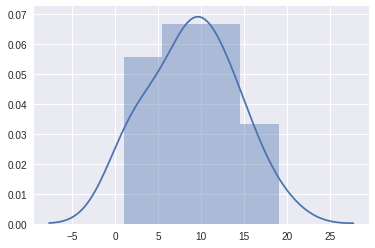

In [12]:
sns.distplot(D);

### Kurtosis

In probability theory and statistics, kurtosis (from Greek: κυρτός, kyrtos or kurtos, meaning "curved, arching") is a measure of the "tailedness" of the probability distribution of a real-valued random variable. In a similar way to the concept of skewness, kurtosis is a descriptor of the shape of a probability distribution and, just as for skewness, there are different ways of quantifying it for a theoretical distribution and corresponding ways of estimating it from a sample from a population.

https://en.wikipedia.org/wiki/Kurtosis

Kurtosis is the fourth **standardized** moment. 

$$\gamma = \operatorname{E}\left[\left(\frac{X-\mu}{\sigma}\right)^4 \right]$$

In python:

In [13]:
kurt = 1/n*np.sum(((D-mu)/np.sqrt(var))**4)
kurt

2.3210002755507682

In [14]:
st.kurtosis(D, fisher=False)

2.3210002755507686

# Describing a Distribution

Using these four values, we can describe the distribution of data.

mu: 8.4, var: 42.940000000000005, skew: 0.430052050664929, kurt: 1.8601573365550088


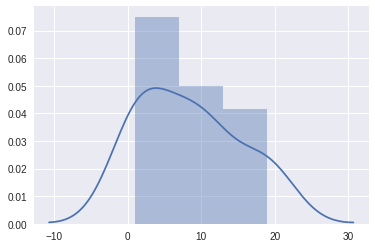

In [15]:
n = 20
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 9.7, var: 34.27, skew: 0.0834419216053738, kurt: 1.7716415301376518


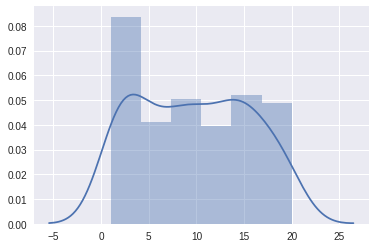

In [16]:
n = 200
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 10.611, var: 34.180679, skew: -0.02036824715343567, kurt: 1.727247891675277


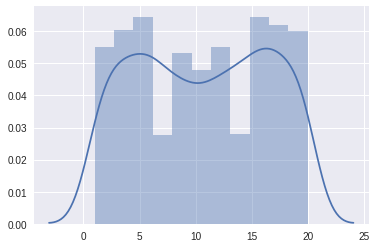

In [17]:
n = 2000
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 10.4459, var: 33.092173190000004, skew: 0.015268759993860508, kurt: 1.792044909283801


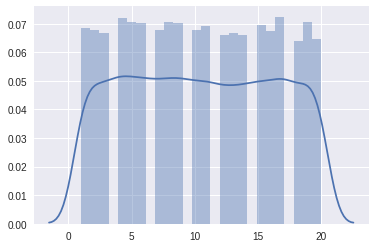

In [18]:
n = 20000
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 10.511165, var: 33.21892534277501, skew: 0.001738100458452334, kurt: 1.793497377542023


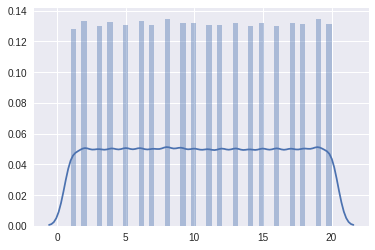

In [19]:
n = 200000
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 10.498873, var: 33.27414972987098, skew: 0.00030871803381595723, kurt: 1.7929308126285404


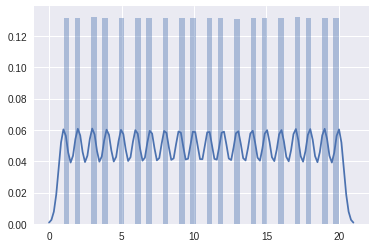

In [20]:
n = 2000000
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

#### `randint` draws from a uniform distribution

    np.random.randint()

    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).

### What about `randn`?

In [21]:
D

array([19,  7,  8, ..., 15, 15, 13])

mu: 0.012748468004146928, var: 0.6837781042851588, skew: -0.391538317135141, kurt: 2.5669975278484514


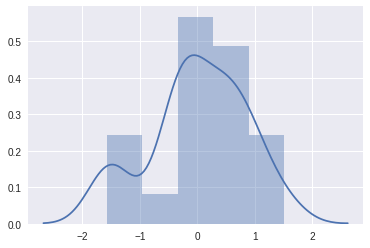

In [22]:
n = 20
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)

mu: -0.014452913856282494, var: 0.9139757541777527, skew: -0.03488727751501666, kurt: 3.0109512151344786


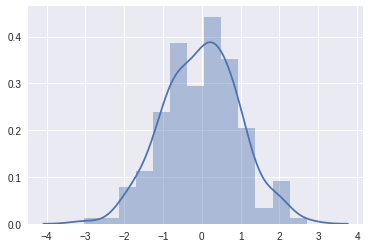

In [23]:
n = 200
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)

mu: 0.005979711297928134, var: 0.9365031163537131, skew: -0.13682026854750753, kurt: 2.9196012971863836


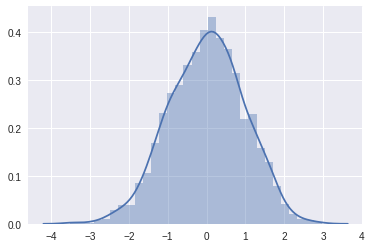

In [24]:
n = 2000
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)

mu: 0.0008686318817886907, var: 0.9839939614152332, skew: 0.019490949279308417, kurt: 2.997661243147151


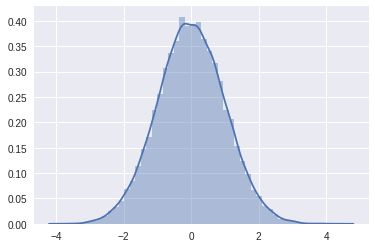

In [25]:
n = 20000
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)

mu: 0.00043631815735180893, var: 1.0009219146685022, skew: 0.0035032525010870517, kurt: 2.9937979839107114


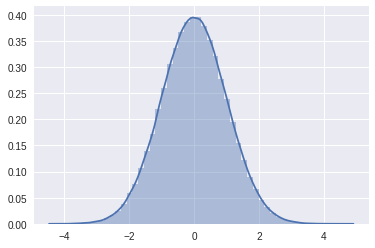

In [26]:
n = 200000
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)